In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns    # optional: for nicer confusion matrix plot
import joblib

In [13]:
csv_path = "language.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Dataset not found at {csv_path}")

df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:")
display(df.head())

Dataset shape: (22000, 2)

Columns: ['Text', 'language']

Sample rows:


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [14]:
print("\nNull counts per column:")
print(df.isnull().sum())

# If there are nulls in Text or language, drop them:
df = df.dropna(subset=["Text", "language"]).reset_index(drop=True)
print("\nAfter dropping nulls shape:", df.shape)

# Show class balance
print("\nLanguage distribution:")
print(df["language"].value_counts())


Null counts per column:
Text        0
language    0
dtype: int64

After dropping nulls shape: (22000, 2)

Language distribution:
language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


In [15]:
X = df["Text"].astype(str)     # ensure strings
y = df["language"]             # this is lowercase 'language' in your file

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTrain size:", X_train.shape[0], "Test size:", X_test.shape[0])



Train size: 17600 Test size: 4400


In [17]:
pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1,2), min_df=1)),   # you can tune ngram_range & min_df
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB())
])

# Train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [19]:
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nTest accuracy:", acc)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix (numeric)
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
cm_df = pd.DataFrame(cm, index=pipeline.classes_, columns=pipeline.classes_)
print("\nConfusion matrix (counts):")
display(cm_df)



Test accuracy: 0.9431818181818182

Classification report:
              precision    recall  f1-score   support

      Arabic     0.6369    1.0000    0.7782       200
     Chinese     0.9459    0.5250    0.6752       200
       Dutch     0.9899    0.9800    0.9849       200
     English     0.6944    1.0000    0.8197       200
    Estonian     1.0000    0.9650    0.9822       200
      French     0.9387    0.9950    0.9660       200
       Hindi     0.9948    0.9650    0.9797       200
  Indonesian     0.9949    0.9750    0.9848       200
    Japanese     0.9766    0.6250    0.7622       200
      Korean     1.0000    0.9750    0.9873       200
       Latin     0.9946    0.9250    0.9585       200
     Persian     0.9950    0.9900    0.9925       200
   Portugese     0.9796    0.9600    0.9697       200
      Pushto     1.0000    0.9600    0.9796       200
    Romanian     0.9949    0.9800    0.9874       200
     Russian     0.9950    0.9900    0.9925       200
     Spanish     0.975

,Arabic,Chinese,Dutch,English,Estonian,French,Hindi,Indonesian,Japanese,Korean,...,Portugese,Pushto,Romanian,Russian,Spanish,Swedish,Tamil,Thai,Turkish,Urdu
Arabic,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chinese,62,105,1,21,0,0,1,0,3,0,...,1,0,0,0,1,1,0,1,3,0
Dutch,0,0,196,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
English,0,0,0,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Estonian,0,0,1,4,193,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
French,0,0,0,0,0,199,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Hindi,0,0,0,7,0,0,193,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indonesian,0,0,0,5,0,0,0,195,0,0,...,0,0,0,0,0,0,0,0,0,0
Japanese,49,6,0,7,0,3,0,1,125,0,...,1,0,1,1,2,3,0,0,1,0
Korean,3,0,0,2,0,0,0,0,0,195,...,0,0,0,0,0,0,0,0,0,0


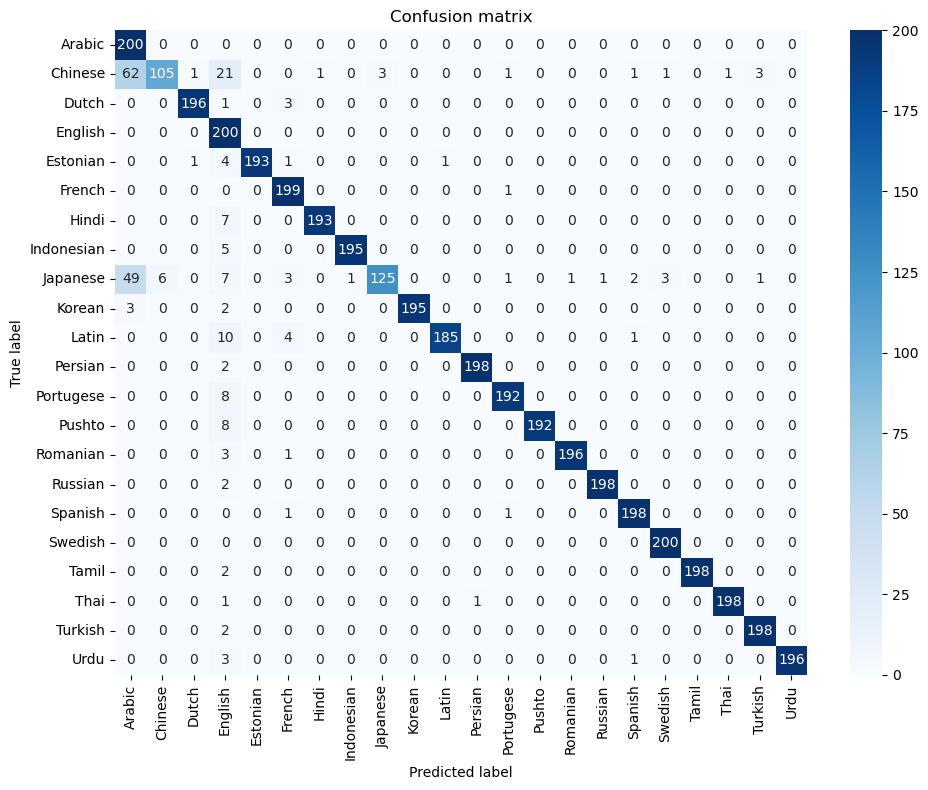

In [20]:
# Optional: plot confusion matrix (works in Jupyter)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [21]:
model_path = "language_nb_pipeline.joblib"
joblib.dump(pipeline, model_path)
print(f"\nModel pipeline saved to: {model_path}")


Model pipeline saved to: language_nb_pipeline.joblib


In [22]:
# Example: load model and predict languages for new texts
loaded = joblib.load(model_path)

samples = [
    "bonjour je m'appelle amaN and i love ai",         # likely French
    "this is an english sentence to test",             # likely English (if present)
    "สวัสดีครับ ผมชื่ออามัน",                          # Thai
    "hola como estas"                                  # Spanish
]

preds = loaded.predict(samples)
for txt, p in zip(samples, preds):
    print("\nText:", txt)
    print("Predicted language:", p)


Text: bonjour je m'appelle amaN and i love ai
Predicted language: English

Text: this is an english sentence to test
Predicted language: English

Text: สวัสดีครับ ผมชื่ออามัน
Predicted language: Thai

Text: hola como estas
Predicted language: Portugese


In [23]:
# 9) OPTIONAL: save predictions on test set to CSV
# -------------------------------
out_df = pd.DataFrame({"Text": X_test, "True": y_test, "Pred": y_pred})
out_df.to_csv("test_set_predictions.csv", index=False)
print("\nSaved test set predictions to test_set_predictions.csv")


Saved test set predictions to test_set_predictions.csv


In [26]:
loaded = joblib.load(model_path)

samples = [
    "klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald"
]

preds = loaded.predict(samples)
for txt, p in zip(samples, preds):
    print("\nText:", txt)
    print("Predicted language:", p)


Text: klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald
Predicted language: Estonian
